# Introduction

Applying ACWR to a Football Team Dataset

In the data set, there are daily sessions of a team in an entire season.

The relationship between acute and chronic workload will be used as a strategy to try to limit injuries by avoiding unaccustomed high-load workouts.

In addition, strategies for "return-to-play(post-injury)" will be illustrated so as not to make the mistake of doing heavy loads in the early periods following return from injury.

The UM dataset contains heart rate, Catapult playerload and GPS coordinates. We will focus on scoring player load and calculating the ratio of acute to chronic workload.

Player positions: Goalkeeper(GK), Defender(D), Midfielder(M) and Forward(F).

## 1. Data Cleaning and Preprocessing

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv("C:/Users/sapga/OneDrive/Desktop/Analisi Calcio/SoccerInjuryPrev.csv", parse_dates=["Date"])

In [3]:
df.head(10)

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06
5,35,Session,F,315.51553,16.69335,0,0,0.00000,2019-08-06
6,95,Session,F,325.23862,17.50760,219,0,169.52066,2019-08-06
7,39,Session,D,239.91634,15.65591,0,0,0.00000,2019-08-06
8,49,Session,F,223.56837,13.60788,213,0,186.40130,2019-08-06
9,66,Session,M,249.47591,14.21178,235,0,171.52356,2019-08-06


We are only interested in the total player load for the session, so we will filter out the rows where the period is titled "Session" and put this into a new dataframe called 'session_df'

### WHAT IS PLAYER LOAD?
Player Load is the sum of the accelerations across all axes of the internal tri-axial accelerometer during movement. It takes into account instantaneous rate of change of acceleration and divides it by a scaling factor (divided by 100). 

In [4]:
session_df = df.loc[df['Period.Name'] == "Session"]
session_df.head(10)

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06
5,35,Session,F,315.51553,16.69335,0,0,0.00000,2019-08-06
6,95,Session,F,325.23862,17.50760,219,0,169.52066,2019-08-06
7,39,Session,D,239.91634,15.65591,0,0,0.00000,2019-08-06
8,49,Session,F,223.56837,13.60788,213,0,186.40130,2019-08-06
9,66,Session,M,249.47591,14.21178,235,0,171.52356,2019-08-06


At the beginning of the season, there were days when the team had more than one training session. Therefore, during the season, there are days when more than one 'session' is recorded in a single day.

To determine the duration of a training session, we can divide the total player load for the session by the player load per minute. Therefore, we determine the duration of the session before proceeding with further calculations and analysis on the data set.

In [5]:
session_df['Session.Duration'] = session_df['Total.Player.Load']/session_df['Player.Load.Per.Minute']
session_df

C:\Users\sapga\AppData\Local\Temp\ipykernel_8784\2889697217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_df['Session.Duration'] = session_df['Total.Player.Load']/session_df['Player.Load.Per.Minute']


,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date,Session.Duration
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06,18.054328
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06,16.941335
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06,16.143162
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06,18.900662
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06,18.310667
...,...,...,...,...,...,...,...,...,...,...
9499,23,Session,GK,185.24280,4.66020,0,0,0.00000,2019-11-24,39.749968
9500,21,Session,D,1364.75000,9.87637,129,0,129.00000,2019-11-24,138.183361
9501,43,Session,M,1294.72809,11.25361,225,0,166.42591,2019-11-24,115.050023
9502,91,Session,F,633.34450,6.94490,128,0,128.00000,2019-11-24,91.195626


We'll delve deeper into internal metrics such as heart rate in upcoming discussions. But for the time being, let's narrow our focus to only the "playerload" and the duration of the session as recorded in the Catapult Sports activities.

In [6]:
columns = ['Date', 'Player.Name', 'Period.Name', 'Position.Name', 'Total.Player.Load','Session.Duration']

session_df = session_df[columns]
session_df

,Date,Player.Name,Period.Name,Position.Name,Total.Player.Load,Session.Duration
0,2019-08-06,12,Session,D,276.85373,18.054328
1,2019-08-06,89,Session,GK,238.00543,16.941335
2,2019-08-06,63,Session,F,231.84551,16.143162
3,2019-08-06,15,Session,D,355.02606,18.900662
4,2019-08-06,44,Session,D,318.82076,18.310667
...,...,...,...,...,...,...
9499,2019-11-24,23,Session,GK,185.24280,39.749968
9500,2019-11-24,21,Session,D,1364.75000,138.183361
9501,2019-11-24,43,Session,M,1294.72809,115.050023
9502,2019-11-24,91,Session,F,633.34450,91.195626


Let's examine the dataset to identify any players who may have sparingly used the Catapult device, as this could distort our dataset.

We can employ the groupby function to organize the entire team lineup based on the cumulative duration of data gathered throughout the season.

In [7]:
Rank_Total_PL = session_df.groupby(['Player.Name', 'Position.Name'])[['Period.Name']].count()
print("Total number of sessions captured during entire season")


print(Rank_Total_PL.sort_values(by='Period.Name', ascending = False))

Total number of sessions captured during entire season
                           Period.Name
Player.Name Position.Name             
12          D                       89
66          M                       89
21          D                       89
97          F                       88
62          F                       88
39          D                       88
43          M                       88
23          GK                      87
35          F                       87
89          GK                      85
4           M                       84
52          D                       84
100         D                       84
34          M                       83
15          D                       83
86          M                       82
44          D                       80
63          F                       80
91          F                       78
71          GK                      77
49          F                       77
48          M                       73
10       

In [8]:
Rank_Total_PL = session_df.groupby(['Player.Name', 'Position.Name'])[['Session.Duration']].sum()
print("Total duration captured for entire season")


print(Rank_Total_PL.sort_values(by='Session.Duration', ascending = False))

Total duration captured for entire season
                           Session.Duration
Player.Name Position.Name                  
89          GK                  7256.995713
62          F                   6949.439679
21          D                   6931.008604
4           M                   6922.743520
43          M                   6896.000699
66          M                   6702.279641
39          D                   6533.952654
100         D                   6507.394600
44          D                   6375.365217
12          D                   6072.777551
52          D                   5765.626189
63          F                   5626.914479
35          F                   5616.998042
97          F                   5398.132561
86          M                   5379.001886
10          D                   5149.013432
91          F                   5052.888632
15          D                   5035.069630
23          GK                  4989.634635
49          F                   48

We can see that Players <b>62</b> and <b>98</b> have very limited minutes and sessions. So we want to delete this two players with <b>drop</b> function.

In [9]:
session_df=session_df.set_index('Player.Name')
session_df=session_df.drop([98, 62])
session_df

,Date,Period.Name,Position.Name,Total.Player.Load,Session.Duration
Player.Name,,,,,
12,2019-08-06,Session,D,276.85373,18.054328
89,2019-08-06,Session,GK,238.00543,16.941335
63,2019-08-06,Session,F,231.84551,16.143162
15,2019-08-06,Session,D,355.02606,18.900662
44,2019-08-06,Session,D,318.82076,18.310667
...,...,...,...,...,...
23,2019-11-24,Session,GK,185.24280,39.749968
21,2019-11-24,Session,D,1364.75000,138.183361
43,2019-11-24,Session,M,1294.72809,115.050023


Move our "player name" out of the index and set the "date" column as the next index.

In [10]:
session_df=session_df.set_index('Date', append=True)
session_df.reset_index(level=['Player.Name'], inplace=True)
session_df['Player.Name'] = session_df['Player.Name'].astype('object')
session_df

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Session.Duration
Date,,,,,
2019-08-06,12,Session,D,276.85373,18.054328
2019-08-06,89,Session,GK,238.00543,16.941335
2019-08-06,63,Session,F,231.84551,16.143162
2019-08-06,15,Session,D,355.02606,18.900662
2019-08-06,44,Session,D,318.82076,18.310667
...,...,...,...,...,...
2019-11-24,23,Session,GK,185.24280,39.749968
2019-11-24,21,Session,D,1364.75000,138.183361
2019-11-24,43,Session,M,1294.72809,115.050023


## 2.Data Manipulation

Here we want to calculate <b> acute chronic workload ratio<b/>.

But what is acute chronic workload ratio?

The Acute Chronic Workload Ratio (ACWR) is a concept used in sports and exercise science to assess and manage training loads. It helps in understanding how training intensity and volume impact an athlete's risk of injury.

The acute chronic workload ratio looks at your activity levels over a four-week period, looking at 4 weeks chronic workload and then one acute weeks workload. Should the ratio be greater than 1.2 there is an increased risk of injury and greater than 1.5 is significant increased risk of injury.

So we can calcute ACWR. 

**Acute Chronic Workload Ratio** = *Acute Phase / Chronic Phase*.

But what are Acute phase and Chronic phase?

In Acute phase, we examine the athlete's most recent work. This is described by a period of approximately 7 days. Phase to measure the athlete's state of fatigue.

In Chronic phase, we examine the athlete's work over a longer period. This is described by a period of approx. 3-6 weeks(normally 28 days). Phase to measure the athlete's fitness status and/or long-term training load.

Let's take the first player as an example. 

We must "fill in" the missing days where data was not collected using the resample function from pandas. We will then use the fillna function to fill in those days with the value 0. This is done to ensure that each day in the 7-day or 28-day window is weighted the same when calculating averages.

In [11]:
df_12 = session_df.loc[session_df['Player.Name'] == 12] 
df_12 = df_12.resample('D').sum()
df_12 = df_12.fillna(0)
df_12

,Total.Player.Load,Session.Duration
Date,,
2019-08-06,1290.83653,147.753533
2019-08-07,1328.71860,212.571606
2019-08-08,0.00000,0.000000
2019-08-09,1224.42053,175.575107
2019-08-10,391.29193,79.173473
...,...,...
2019-11-20,277.82471,48.422692
2019-11-21,306.31356,47.066656
2019-11-22,1370.46912,134.992861


### Calculating Acute Chronic Workload Ratio

We will create 2 new columns to store the 7-day and 28-day moving averages, titled "Acute_PL" and "Chronic_PL", respectively. We will also create a new column titled "Acute:Chronic" that stores the acute to chronic player load ratio.

In [12]:
df_12["Acute_PL"] = (df_12.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7
df_12["Chronic_PL"] = (df_12.loc[:,"Total.Player.Load"].rolling('28D', 28).sum())/28
df_12["Acute:Chronic"] = df_12.loc[:,"Acute_PL"]/df_12.loc[:,"Chronic_PL"]
df_12

,Total.Player.Load,Session.Duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-08-06,1290.83653,147.753533,NaN,NaN,NaN
2019-08-07,1328.71860,212.571606,NaN,NaN,NaN
2019-08-08,0.00000,0.000000,NaN,NaN,NaN
2019-08-09,1224.42053,175.575107,NaN,NaN,NaN
2019-08-10,391.29193,79.173473,NaN,NaN,NaN
...,...,...,...,...,...
2019-11-20,277.82471,48.422692,376.017229,270.497919,1.390093
2019-11-21,306.31356,47.066656,385.597211,270.831470,1.423753
2019-11-22,1370.46912,134.992861,392.976070,305.296359,1.287195


Note: By using the "minimum observations" parameter in the rolling function we are able to make sure that we are not generating a number before we have an adequate number of observations.

For example, in this line of code from above:

df_12["Acute_PL"] = (df_12.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7

The rolling function allows us to provide the size of the "window" that we want to capture the rolling value for (in this case we have '7D' to represent our 7 day window). However, we have also included the '7' in the next parameter which is the minimum period. This way -- we are not attempting to generate a value for the acute player load variable before we have 7 days of observations.

## 3.Data Visualization

We will generate two subplots to visualize both the acute to chronic ratio and the daily total player loads for Player 12.

First is a bar graph showing the average player load for each day.
Second is a bar graph showing Acute player load (light pink bars), Chronic player load (shaded orange), Acute to chronic workload ratio (dark purple line) and "Normal" threshold (green line).

The acute to chronic workload ratio (and the chronic workload value) do not start until 28 days (this is due to the calculation of the rolling averages requiring a minimum of 28 observations).  This makes for a cleaner visualization as well.

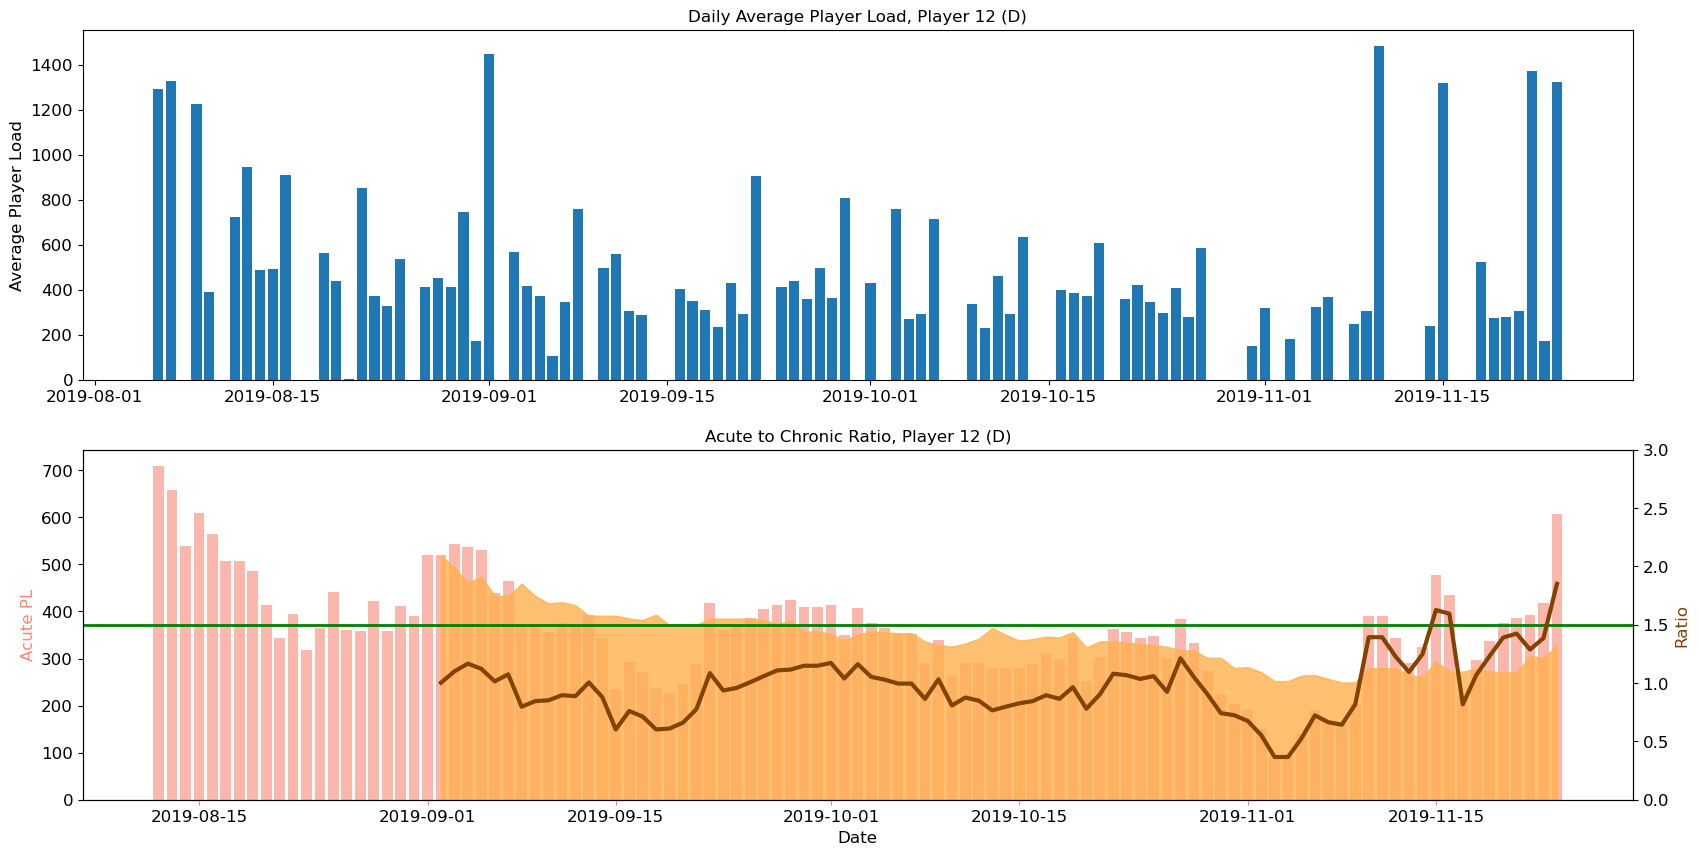

In [17]:
fig, axs = plt.subplots(2,figsize=(20, 10))

axs[0].bar(df_12.index, df_12["Total.Player.Load"])
#axs[0].set_xlabel("Date", fontsize=12)
axs[0].tick_params(axis='x', labelsize=12,)
axs[0].set_ylabel('Average Player Load', fontsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_title("Daily Average Player Load, Player 12 (D)", fontsize=12)

color='#FA8775'
axs[1].set_xlabel("Date", fontsize=12)
axs[1].tick_params(axis='x', labelsize=12, color=color)
axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
axs[1].bar(df_12.index, df_12["Acute_PL"], color=color, alpha=0.6)
axs[1].tick_params(axis='y', labelsize=12)
color='#FFB14E'
axs[1].fill_between(df_12.index, df_12["Chronic_PL"], color=color, alpha=0.8)
axs[1] = plt.gca()
axs[1].set_title("Acute to Chronic Ratio, Player 12 (D)", fontsize=12)
axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color='#824200'
axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
axs1.plot(df_12.index, df_12["Acute:Chronic"], color=color, linewidth=3.0)
axs1.tick_params(axis='y', labelsize=12)
axs1 = plt.gca()

# To see how the acute to chronic workload ratio drops over the first 28 days, 
# comment out this line by adding a '#' in front of the line
axs1.set_ylim([0,3.0])

axs1.axhline(y=1.5,c="green",linewidth=2,zorder=0)

This illustration offers a clear description of Player 12's daily player load, which peaked during the season's initial days due to two separate training sessions. This peak was evident again towards the season's end on match days, suggesting that Player 12 probably played a significant portion of these games, as inferred from the player loads.

Turning our attention to the acute to chronic workload ratio (ACWR), we notice that Player 12 had an elevated acute player load early in the season, as represented by the light pink bars. This led to the ACWR consistently staying below the 1.5 benchmark until the end of the season, during tournament matches.

To draw comparisons, let's now shift our focus to another team member who had intermittent absences from practices or matches.

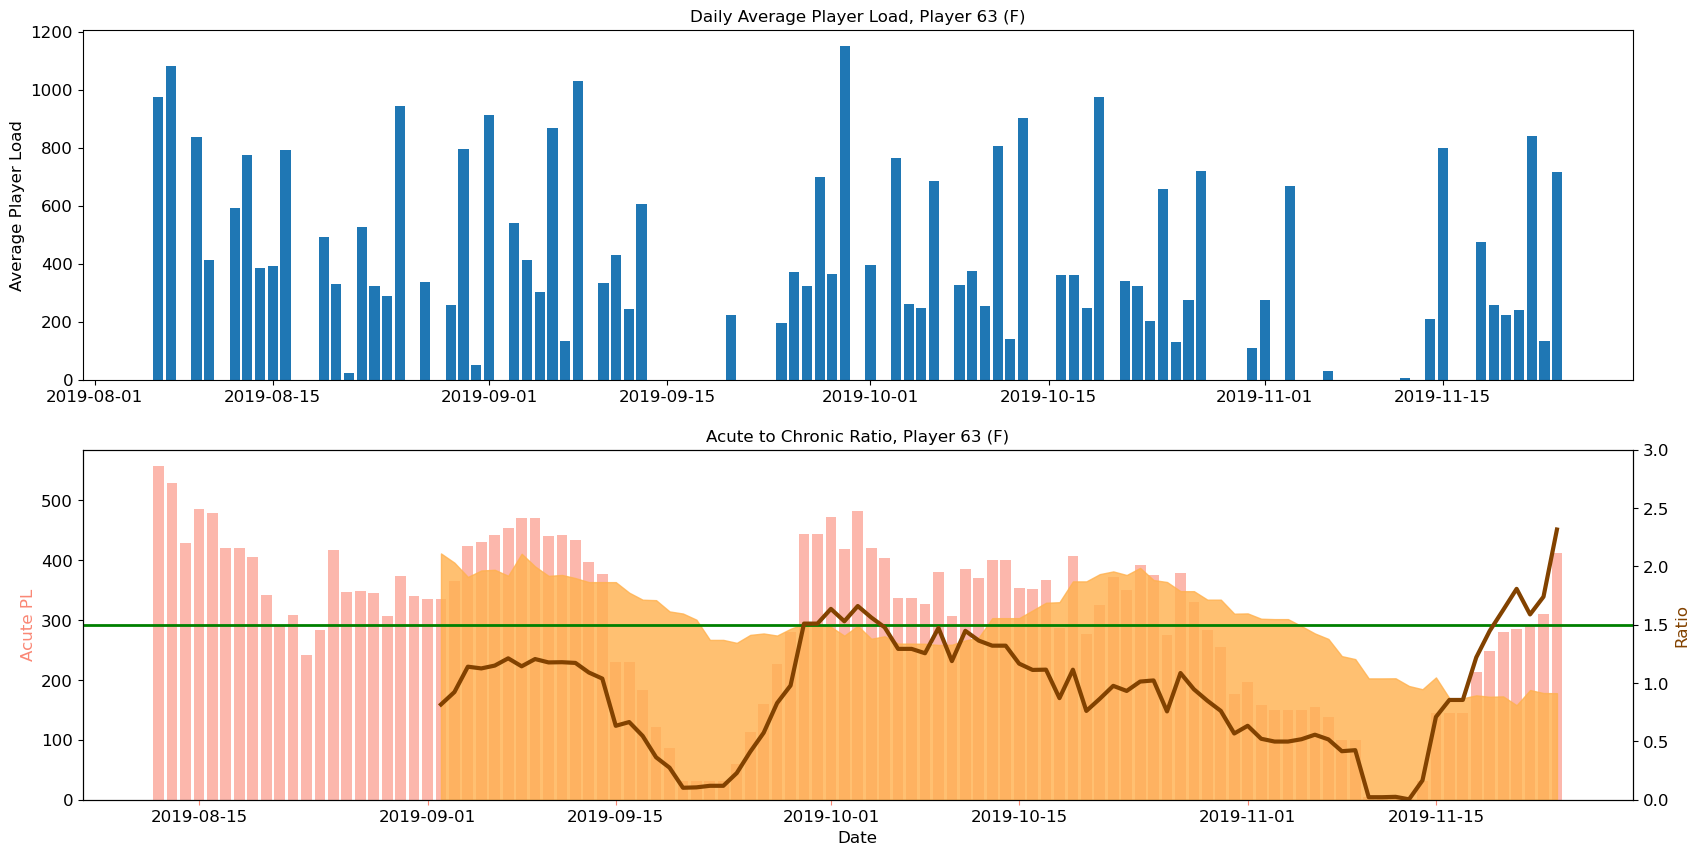

In [18]:
df_63 = session_df.loc[session_df['Player.Name'] == 63] 
df_63 = df_63.resample('D').sum()
df_63 = df_63.fillna(0)

df_63["Acute_PL"] = (df_63.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7
df_63["Chronic_PL"] = (df_63.loc[:,"Total.Player.Load"].rolling('28D', 28).sum())/28
df_63["Acute:Chronic"] = df_63.loc[:,"Acute_PL"]/df_63.loc[:,"Chronic_PL"]

fig, axs = plt.subplots(2,figsize=(20, 10))

axs[0].bar(df_63.index, df_63["Total.Player.Load"])
#axs[0].set_xlabel("Date", fontsize=12)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_ylabel('Average Player Load', fontsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_title("Daily Average Player Load, Player 63 (F)", fontsize=12)

color='#FA8775'
axs[1].set_xlabel("Date", fontsize=12)
axs[1].tick_params(axis='x', labelsize=12, color=color)

axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
axs[1].bar(df_63.index, df_63['Acute_PL'], color=color, alpha=0.6)
axs[1].tick_params(axis='y', labelsize=12)

color='#FFB14E'
axs[1].fill_between(df_63.index, df_63["Chronic_PL"], color=color, alpha=0.8)
axs[1] = plt.gca()
axs[1].set_title("Acute to Chronic Ratio, Player 63 (F)", fontsize=12)
axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color='#824200'
axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
axs1.plot(df_63.index, df_63["Acute:Chronic"], color=color, linewidth=3.0)
axs1.tick_params(axis='y', labelsize=12)
axs1 = plt.gca()

# To see how the acute to chronic workload ratio drops over the first 28 days, 
# comment out this line by adding a '#' in front of the line
axs1.set_ylim([0,3.0])

axs1.axhline(y=1.5,c="green",linewidth=2,zorder=0)

From the data, we observe that this player had breaks during mid to late-September and another in early November. Significantly, these breaks result in pronounced spikes in the ACWR during their return to play. Wearable tech offers a valuable tool in gauging the intensity of an athlete's return to play post-break, ensuring they don't rush back into high-intensity play prematurely.

To round off our analysis, let's delve into another team member, Player 89, the goalkeeper. From prior information, we know they logged the longest session durations compared to their teammates. Given this, it'll be intriguing to see how their ACWR compares.

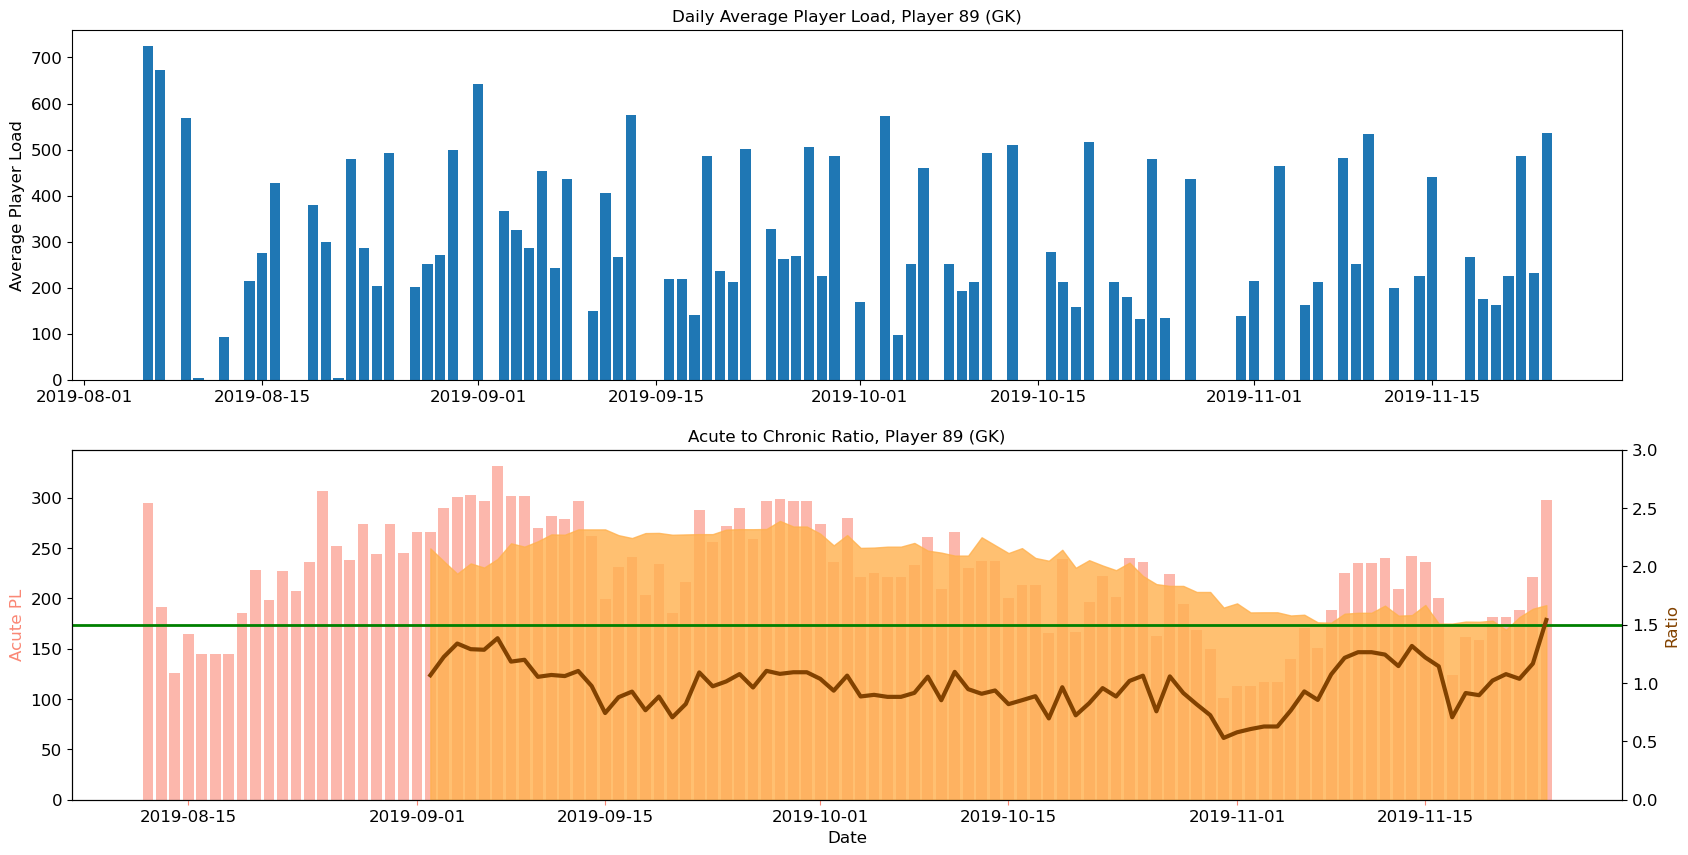

In [19]:
df_89 = session_df.loc[session_df['Player.Name'] == 89] 
df_89 = df_89.resample('D').sum()
df_89 = df_89.fillna(0)

df_89["Acute_PL"] = (df_89.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7
df_89["Chronic_PL"] = (df_89.loc[:,"Total.Player.Load"].rolling('28D', 28).sum())/28
df_89["Acute:Chronic"] = df_89.loc[:,"Acute_PL"]/df_89.loc[:,"Chronic_PL"]

fig, axs = plt.subplots(2,figsize=(20, 10))

axs[0].bar(df_89.index, df_89["Total.Player.Load"])
#axs[0].set_xlabel("Date", fontsize=12)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_ylabel('Average Player Load', fontsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_title("Daily Average Player Load, Player 89 (GK)", fontsize=12)

color='#FA8775'
axs[1].set_xlabel("Date", fontsize=12)
axs[1].tick_params(axis='x', labelsize=12, color=color)
axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
axs[1].bar(df_89.index, df_89["Acute_PL"], color=color, alpha=0.6)
axs[1].tick_params(axis='y', labelsize=12)

color='#FFB14E'
axs[1].fill_between(df_89.index, df_89["Chronic_PL"], color=color, alpha=0.8)
axs[1] = plt.gca()
axs[1].set_title("Acute to Chronic Ratio, Player 89 (GK)", fontsize=12)
axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color='#824200'
axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
axs1.plot(df_89.index, df_89["Acute:Chronic"], color=color, linewidth=3.0)
axs1.tick_params(axis='y', labelsize=12)
axs1 = plt.gca()

# To see how the acute to chronic workload ratio drops over the first 28 days, 
# comment out this line by adding a '#' in front of the line
axs1.set_ylim([0,3.0])

axs1.axhline(y=1.5,c="green",linewidth=2,zorder=0)

This athlete displayed a balanced performance throughout the season, maintaining their ACWR below the somewhat arbitrary threshold of 1.5 until the season's very end. While goalkeepers typically cover less distance than outfield players, they might still register a significant player load due to the accelerations inherent in their role.

To obtain a holistic view of the team's performance and dynamics, let's consolidate the data from all players and examine the collective ACWR. We'll compile this information into a new dataframe, "df_all". This comprehensive perspective will offer insights into overarching team trends and patterns.

In [20]:
df_all = session_df.groupby("Date").sum()
df_all = df_all.resample('D').sum()
df_all = df_all.fillna(0)

df_all["Acute_PL"] = (df_all.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7
df_all["Chronic_PL"] = (df_all.loc[:,"Total.Player.Load"].rolling('28D', 28).sum())/28
df_all["Acute:Chronic"] = df_all.loc[:,"Acute_PL"]/df_all.loc[:,"Chronic_PL"]

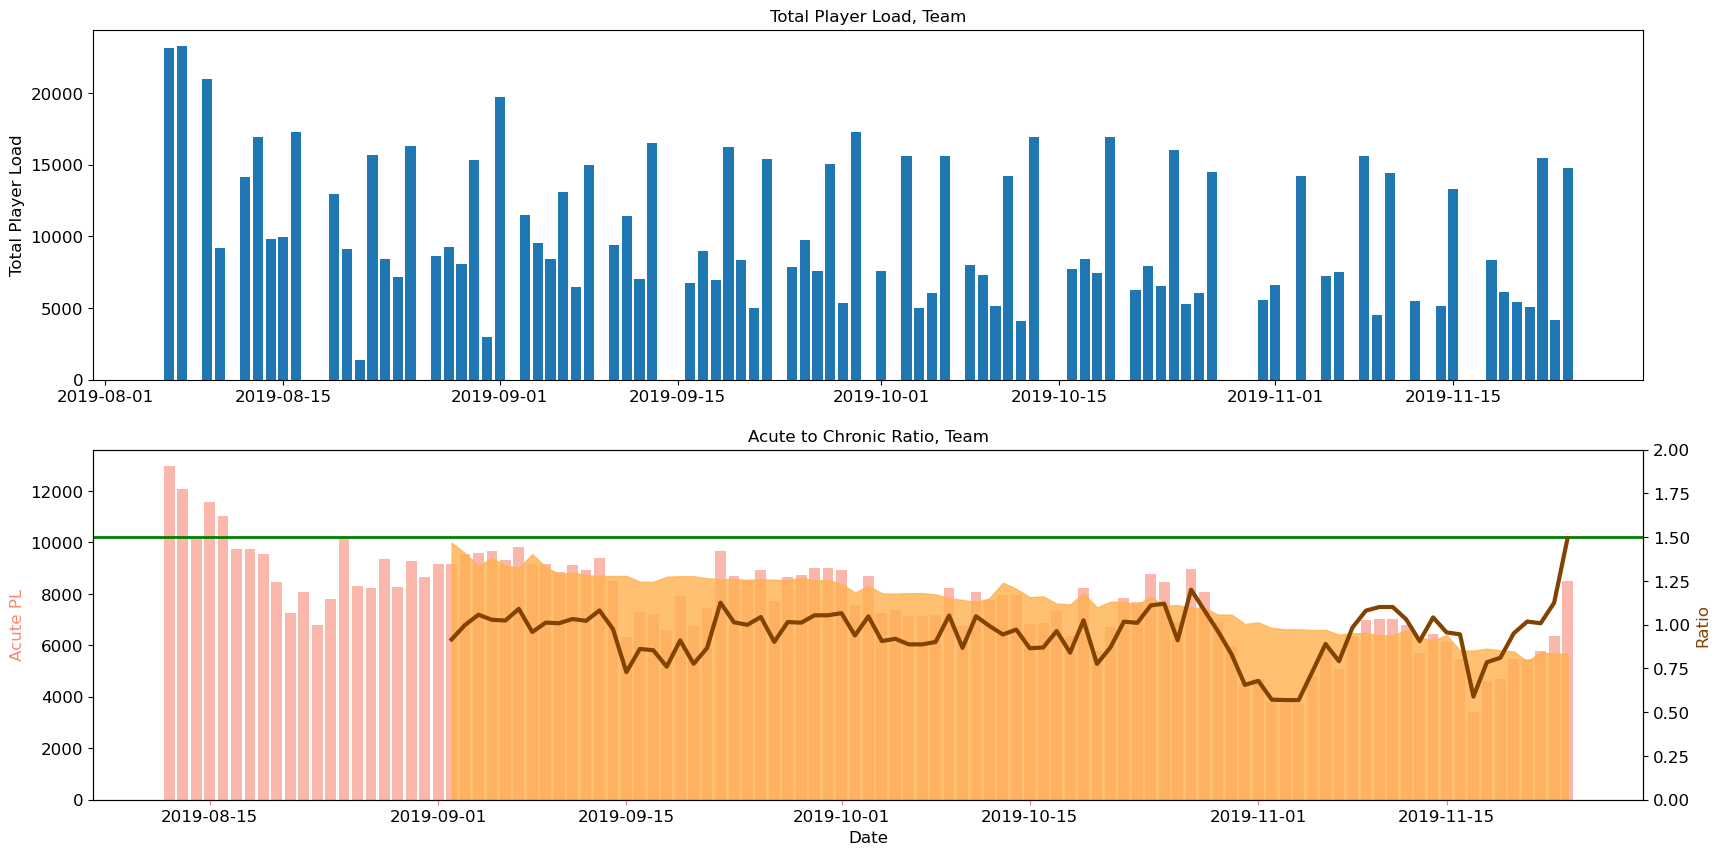

In [21]:
fig, axs = plt.subplots(2,figsize=(20, 10))

axs[0].bar(df_all.index, df_all["Total.Player.Load"])
#axs[0].set_xlabel("Date", fontsize=12)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_ylabel('Total Player Load', fontsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_title("Total Player Load, Team", fontsize=12)

color='#FA8775'
axs[1].set_xlabel("Date", fontsize=12)
axs[1].tick_params(axis='x', labelsize=12, color=color)
axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
axs[1].bar(df_all.index, df_all["Acute_PL"], color=color, alpha=0.6)
axs[1].tick_params(axis='y', labelsize=12)

color='#FFB14E'
axs[1].fill_between(df_all.index, df_all["Chronic_PL"], color=color, alpha=0.8)
axs[1] = plt.gca()
axs[1].set_title("Acute to Chronic Ratio, Team", fontsize=12)
axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color='#824200'
axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
axs1.plot(df_all.index, df_all["Acute:Chronic"], color=color, linewidth=3.0)
axs1.tick_params(axis='y', labelsize=12)
axs1 = plt.gca()

# To see how the acute to chronic workload ratio drops over the first 28 days, 
# comment out this line by adding a '#' in front of the line
axs1.set_ylim([0,2.0])

axs1.axhline(y=1.5,c="green",linewidth=2,zorder=0)

There are additional functions that allow us to find specific values or metrics more easily. We will be focusing on finding the minimum and maximum player load and acute to chronic workload ratio.

You can use nlargest() and nsmallest() to find the rows containing the highest 'n' or lowest 'n' values of a column.

In [22]:
df_all.nlargest(5, 'Total.Player.Load')

,Total.Player.Load,Session.Duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-08-07,23271.41950,4549.577157,NaN,NaN,NaN
2019-08-06,23137.80677,3080.287415,NaN,NaN,NaN
2019-08-09,20985.59830,3626.730549,NaN,NaN,NaN
2019-09-01,19743.50586,2971.463101,9155.694257,NaN,NaN
2019-08-16,17305.52462,1934.711398,11046.745824,NaN,NaN


From the team ranking, it's evident that the highest total playerloads for a single day were during the two-a-day practices at the season's outset on August 6th, 7th, and 9th. These practices registered the top values for the entire season.

However, it's crucial to understand that game days typically involve intense exertion for participating players. In our analysis, though, we're aggregating data from the entire team, which can dilute individual efforts. Highlighting this point, the 4th and 5th highest team playerloads occurred on game days — September 1st and August 16th. Interestingly, despite the shorter duration of these game days, the playerload was nearly as elevated, emphasizing the intensity of match play.

In [23]:
df_all.nlargest(5, 'Acute:Chronic')

,Total.Player.Load,Session.Duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-11-24,14747.77420,1736.455432,8487.232586,5679.085158,1.494472
2019-10-27,14501.17910,1824.957814,8960.459176,7463.725074,1.200534
2019-09-22,15381.46510,1984.078430,9655.861634,8575.321742,1.126006
2019-11-23,4165.01665,807.999986,6380.407700,5670.278190,1.125237
2019-10-25,5286.90142,907.866493,8446.504621,7539.558819,1.120292


It's evident from the data that the team's ACWR values (calculated using the 7-day acute and 28-day chronic windows) never surpassed the threshold of 1.5 throughout the season. Nonetheless, it's noteworthy that the ratio came close, reaching 1.49+ on the final day of the season, November 24. This indicates that the team was pushing its limits, especially towards the season's conclusion.